In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import skimage.io
from skimage.color import rgb2lab
from skimage import transform
from scipy.sparse.linalg import eigsh

In [2]:
img = cv2.imread("/content/test2.jpg",0)
img_resized = cv2.resize(img, (int(0.3*img.shape[1]), int(0.3*img.shape[0])))

In [6]:
#### CREATING WEIGHT MATRIX BASED ON INTENSITY DIFFERENCE:

def intensity_weight_Matrix(img):                                                                                 

  weight = np.abs(np.float32(img.flatten()[:, np.newaxis]) - np.float32(img.flatten()[np.newaxis, :]))
  W = np.exp(-weight/10)*255
  return W

In [7]:
### Segmented Image based on intensity

def intensity_segmented(img):

  # Similarity Matrix based on intensity only
  W = intensity_weight_Matrix(img)

  # Diagonal Matrix - D
  D = np.zeros_like(W)
  np.fill_diagonal(D, np.sum(W, axis=1))

  A = D - W
  _, eig_vector = eigsh(A, k=2, which='SA')
  op_image = eig_vector[:, 1].reshape(img.shape[0], img.shape[1])

  return op_image

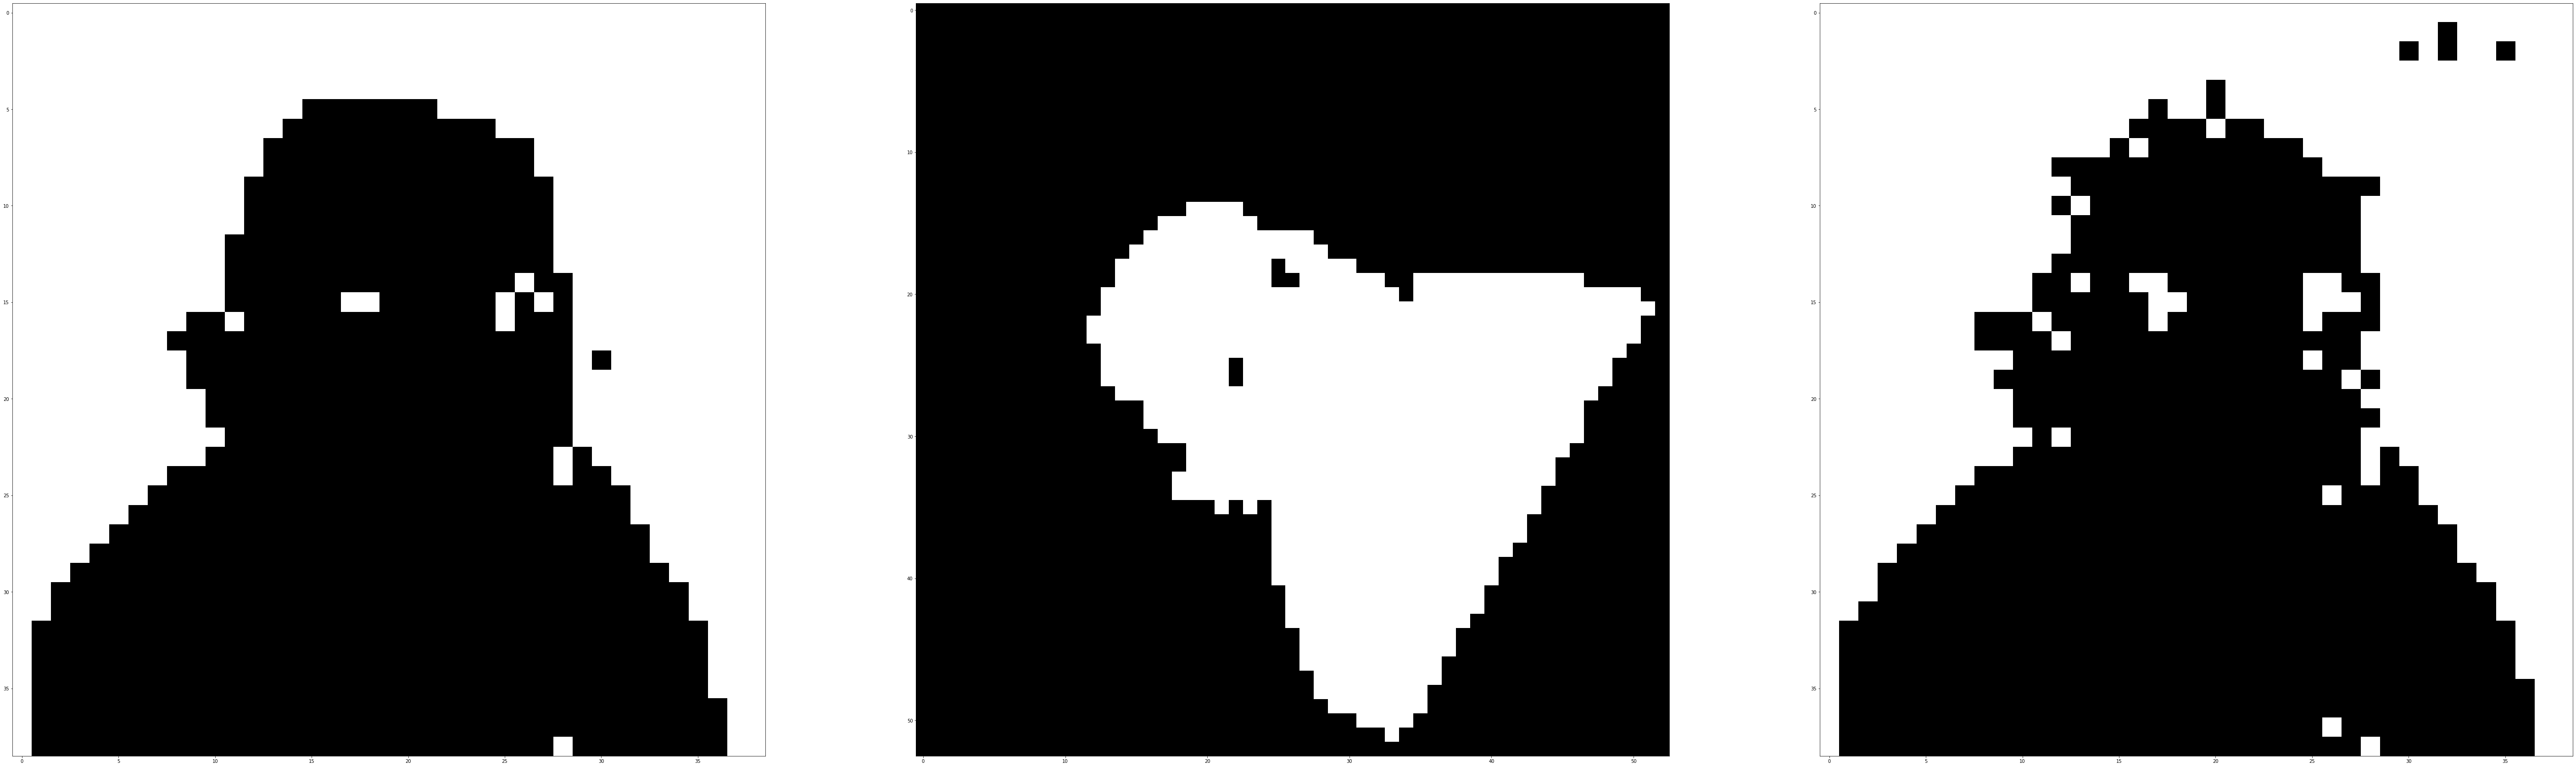

In [8]:
def outputs(img_resized):
  
  img_rotate = skimage.transform.rotate(img_resized, 60, resize=True)
  img_gauss = skimage.util.random_noise(img_resized, mode='gaussian')


  original_image = intensity_segmented(img_resized)
  rotated_image = intensity_segmented(img_rotate)
  noisy_image = intensity_segmented(img_gauss)


  plt.figure(figsize=(100,100))

  #SEGMENTED IMAGE
  plt.subplot(131)
  plt.imshow(original_image>0, cmap="gray")

  #ROTATE

  plt.subplot(132)
  plt.imshow(rotated_image>0, cmap="gray")

  #GAUSSIAN NOISE

  plt.subplot(133)
  plt.imshow(noisy_image>0, cmap="gray")
  plt.show()

outputs(img_resized)


In [10]:
#### CREATING POSTIONAL WEIGHT MATRIX

def positional_weight_Matrix(img): 
  m,n = img.shape                                                                                                     
  X, y = np.meshgrid(np.arange(m), np.arange(n))                                                                 
  X = X.flatten()
  Y = y.flatten()

  distance = np.sqrt((X[:, np.newaxis] - X[np.newaxis, :])**2 + (Y[:, np.newaxis] - Y[np.newaxis, :])**2)
  W = np.exp(-distance/5)
  W =W*(W>0.58)
  return W

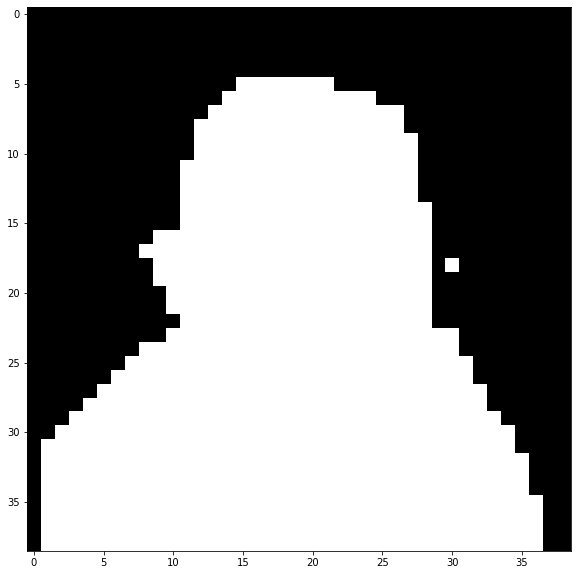

In [11]:
### Segmented Image based on intensity and distance similarity

def two_similarity_segmented(img):

  # Similarity Matrix based on both distance and intensity
  W = intensity_weight_Matrix(img) * positional_weight_Matrix(img)

  # Diagonal Matrix - D
  D = np.zeros_like(W)
  np.fill_diagonal(D, np.sum(W, axis=1))

  A = D - W
  _, eig_vector = eigsh(A, k=2, which='SA')
  op_image = eig_vector[:, 1].reshape(img.shape[0], img.shape[1])

  return op_image

plt.figure(figsize=(10,10))
plt.imshow(two_similarity_segmented(img_resized)>0,cmap="gray")
plt.show()